In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [2]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [6]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2276 - accuracy: 0.9335 - val_loss: 0.1144 - val_accuracy: 0.9666
Epoch 2/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0851 - accuracy: 0.9743 - val_loss: 0.0774 - val_accuracy: 0.9767
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0541 - accuracy: 0.9836 - val_loss: 0.0627 - val_accuracy: 0.9810
Epoch 4/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0369 - accuracy: 0.9887 - val_loss: 0.0608 - val_accuracy: 0.9813
Epoch 5/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0556 - val_accuracy: 0.9824
Epoch 6/10
600/600 [==============================] - 4s 6ms/step - loss: 0.0191 - accuracy: 0.9947 - val_loss: 0.0616 - val_accuracy: 0.9812
Epoch 7/10
600/600 [==============================] - 3s 6ms/step - loss: 0.0139 - accuracy: 0.9958 - val_loss: 0.0631 - val_accuracy: 0.9820
Epoch 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

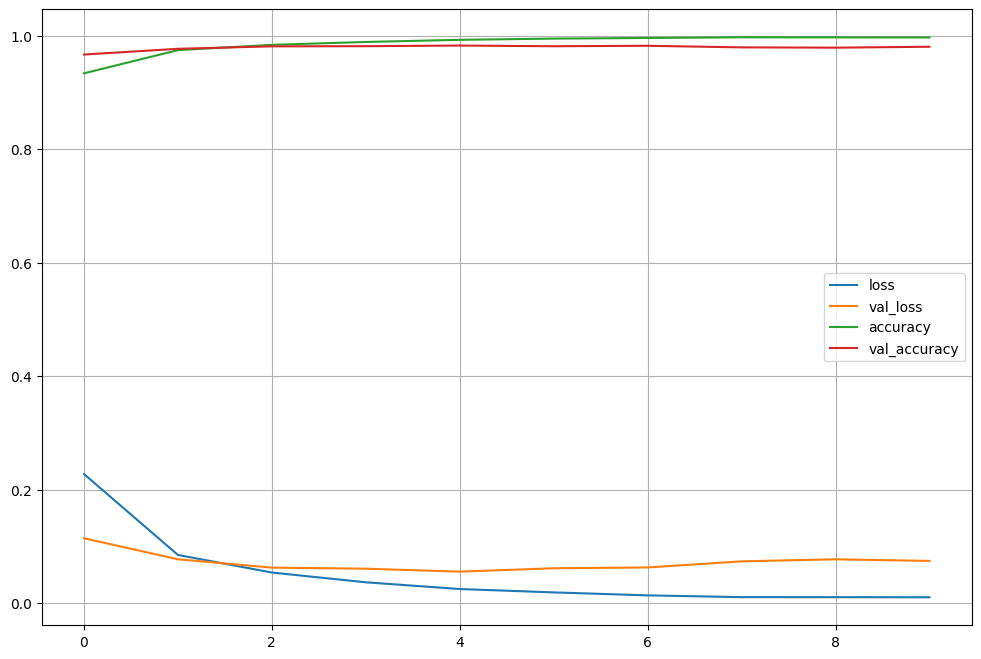

In [9]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [11]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0745 - accuracy: 0.9803
Test loss :  0.07454224675893784
Test accuracy :  0.9803000092506409


In [12]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [13]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [14]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

197

In [15]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[4740,
 9770,
 6011,
 4497,
 1247,
 947,
 2070,
 6045,
 9071,
 8522,
 340,
 1319,
 720,
 8325,
 7432,
 3558]

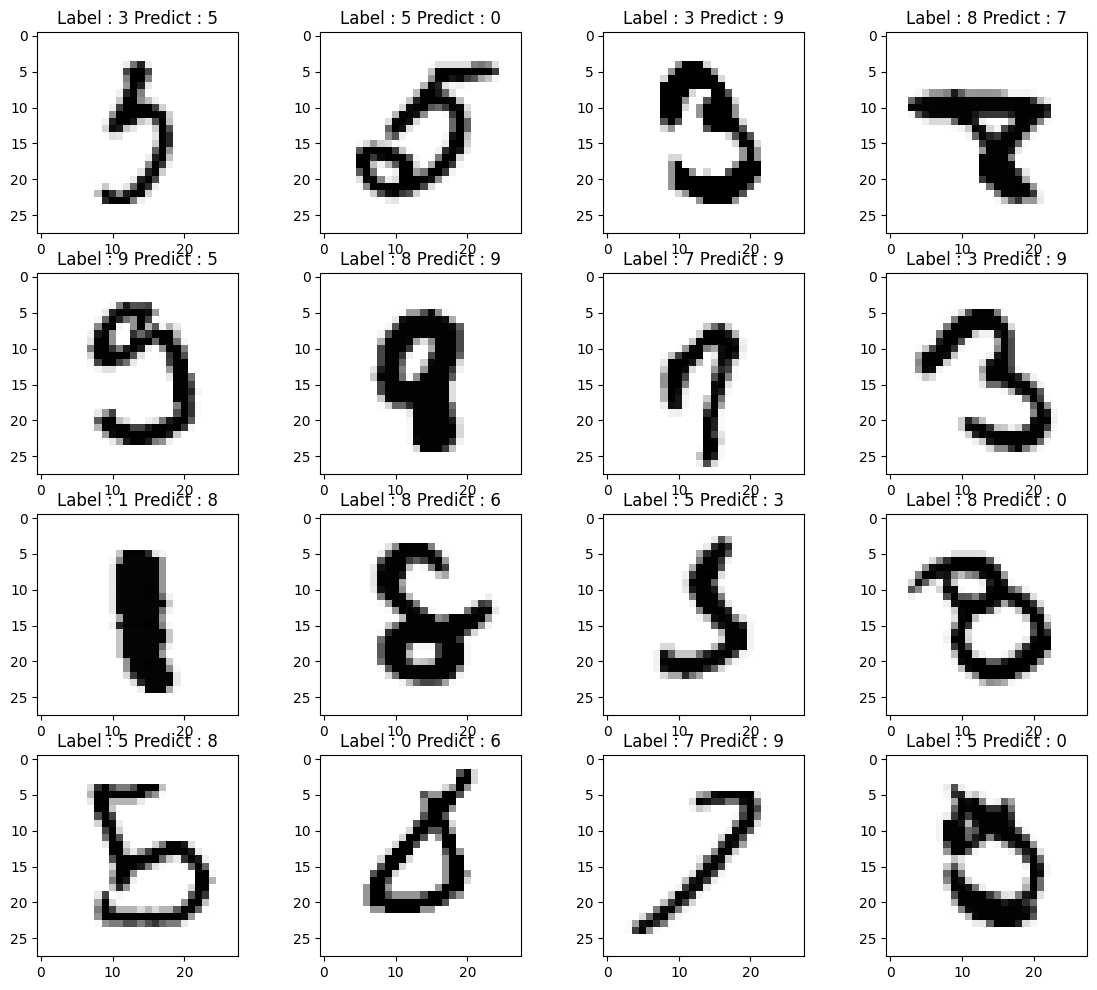

In [17]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis=('off')
    
plt.show()

----------------------

In [18]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0 , x_test / 255.0

4431872/4422102 [==============================] - 1s 0us/step


In [19]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

samples = random.choices(population=range(0, len(y_train)), k=16)

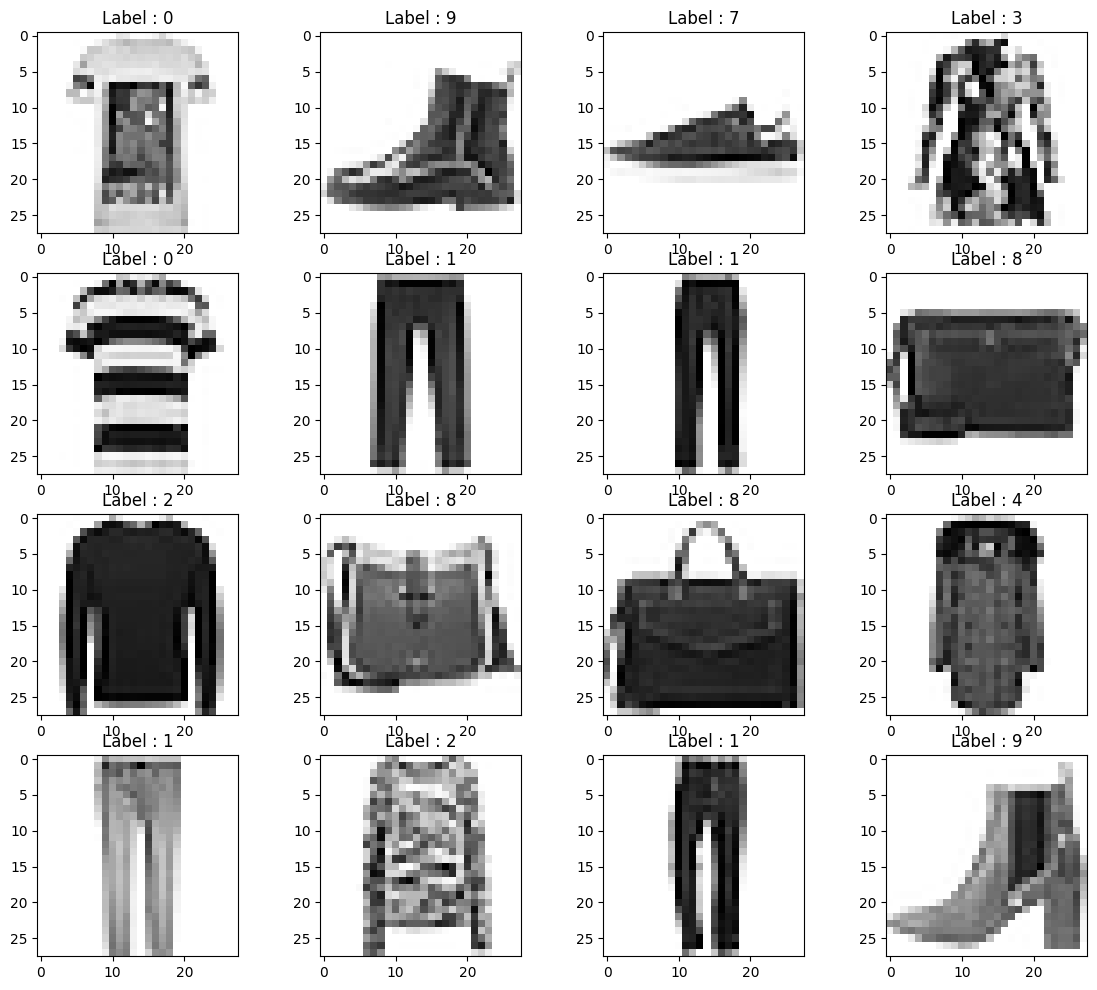

In [20]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]) )
    plt.axis=('off')
    
plt.show()

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [24]:
import time

start_time = time.time()
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                epochs=10, batch_size=100, verbose=1)
print('Fit time : ', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 4s 6ms/step - loss: 0.4829 - accuracy: 0.8285 - val_loss: 0.4119 - val_accuracy: 0.8535
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3603 - accuracy: 0.8694 - val_loss: 0.3762 - val_accuracy: 0.8606
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.3213 - accuracy: 0.8828 - val_loss: 0.3674 - val_accuracy: 0.8661
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2988 - accuracy: 0.8894 - val_loss: 0.3565 - val_accuracy: 0.8732
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2807 - accuracy: 0.8954 - val_loss: 0.3298 - val_accuracy: 0.8806
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2635 - accuracy: 0.9016 - val_loss: 0.3554 - val_accuracy: 0.8715
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2512 - accuracy: 0.9062 - val_loss: 0.3696 - val_accuracy: 0.8704
Epoch 

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

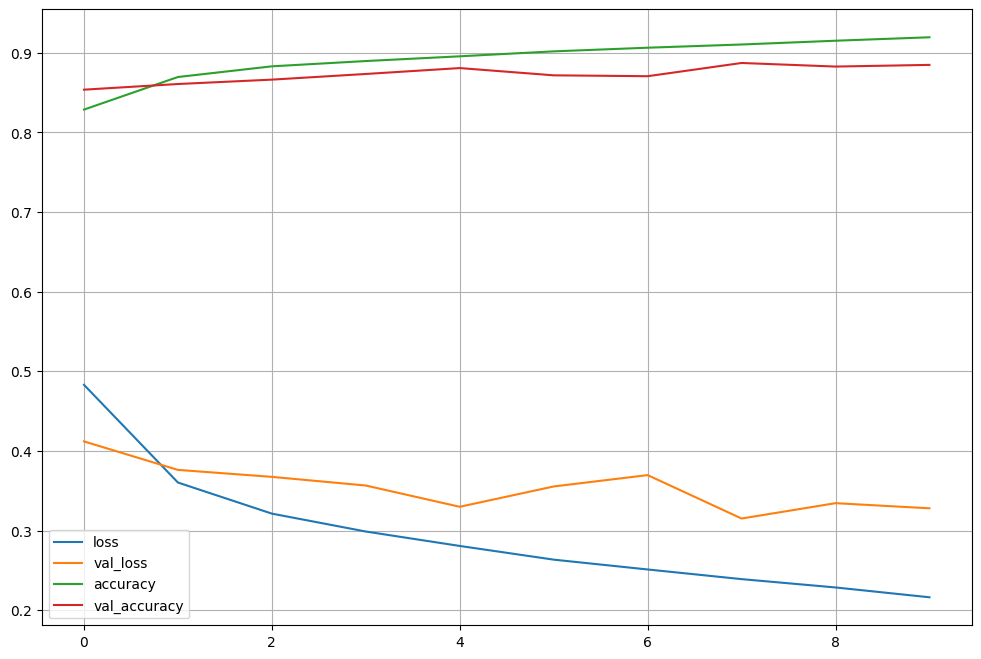

In [26]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [27]:
score = model.evaluate(x_test, y_test)
print('Test loss : ', score[0])
print('Test accuracy : ', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.3279 - accuracy: 0.8846
Test loss :  0.3279396891593933
Test accuracy :  0.8845999836921692


In [28]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [29]:
y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [30]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)
        
len(wrong_result)

1154

In [31]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[6096,
 1356,
 9114,
 5458,
 2039,
 8532,
 669,
 9211,
 6649,
 2076,
 4692,
 1055,
 3731,
 222,
 3789,
 1848]

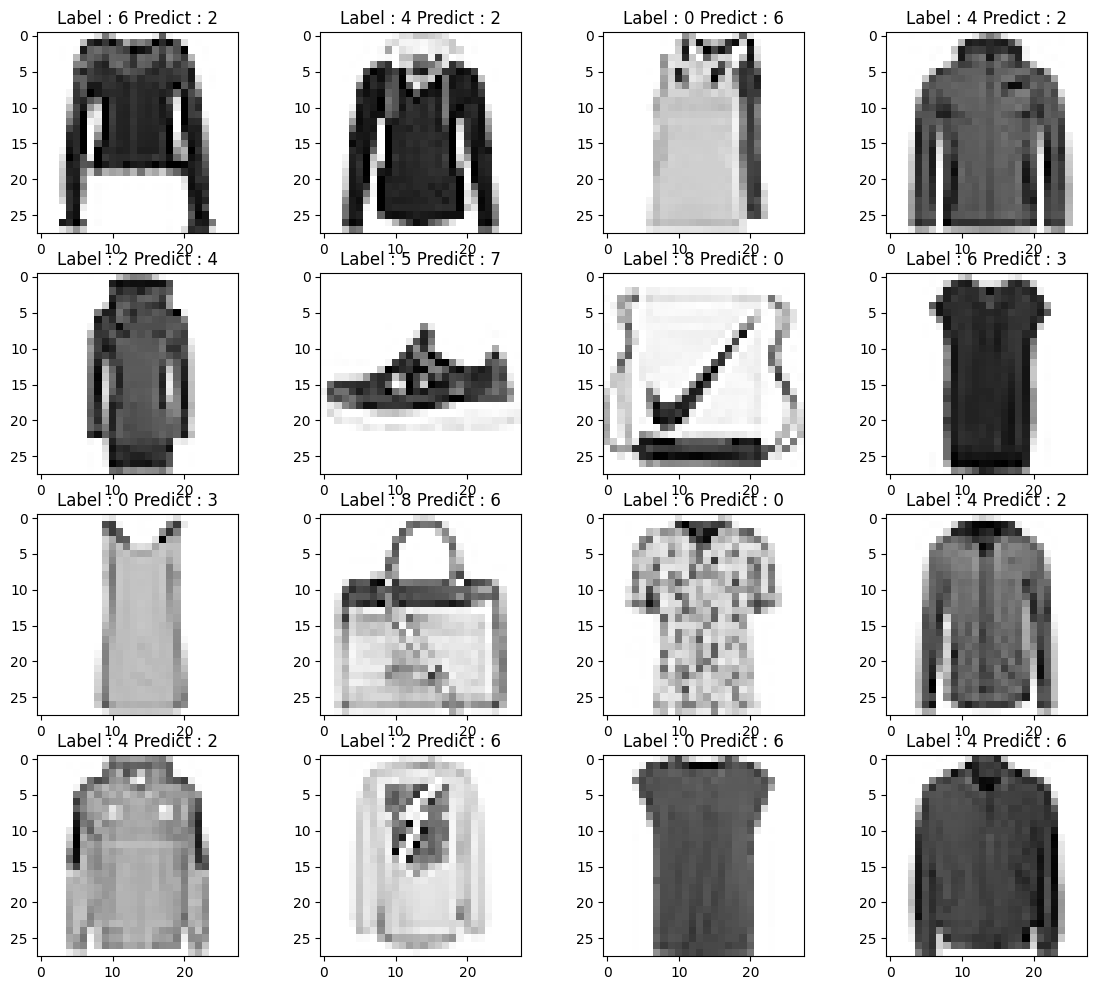

In [32]:
plt.figure(figsize=(14, 12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis=('off')
    
plt.show()